In [1213]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import sys
from time import sleep
from scipy.signal import convolve2d
import matplotlib.cm as cm
from PIL import Image

In [1198]:
img = Image.open('./img.png')

In [1199]:
img = img.resize((64, 64), Image.ANTIALIAS)

<IPython.core.display.Javascript object>


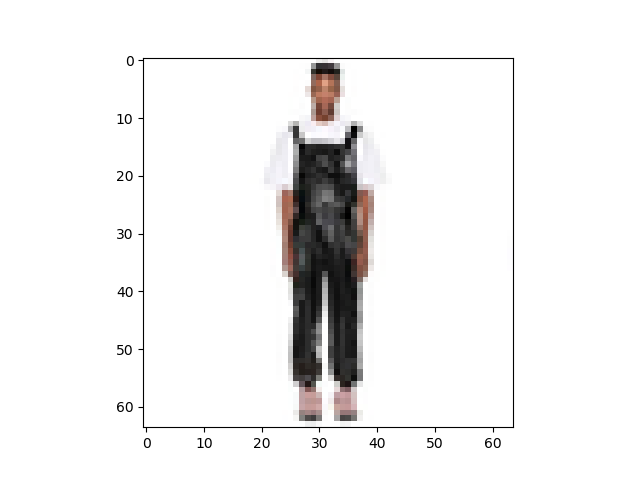

In [1203]:
plt.imshow(np.asarray(img))

In [2]:
sys.executable

'/Users/darko/anaconda3/envs/iis-project/bin/python'

In [3]:
img = mpimg.imread('../img_align_celeba/000023.jpg')

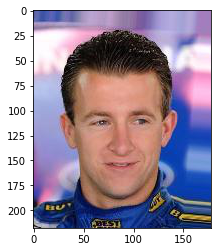

In [4]:
plt.imshow(img)

In [1160]:
def random_rectangle(img):
    mask = np.zeros(img.shape)
    w, h = img.shape[:2]
    img_area = w * h
    mask_area = 0
    offset = 10
    
    while 0.1 >= mask_area/img_area <= 0.4:
        x1, y1 = random.randrange(offset, int(w*0.6)), random.randrange(offset, int(h*0.6))
        x2, y2 = random.randrange(x1 + 1, w - offset), random.randrange(y1 + 1, h - offset)
        
        mask_area = (x2 - x1) * (y2 - y1)
        
    mask[x1:x2, y1:y2] = 1
    
    return mask

In [1047]:
def centered_rectangle(img):
    mask = np.zeros(img.shape)
    h, w = img.shape[:2]
    img_area = w * h
    mask_area = 0
    cx, cy = int(h/2), int(w/2)
    offset = 0
    min_pix = 20
    
    while not (0.1 <= (mask_area/img_area) <= 0.4):
        left = random.randrange(min_pix, int(w/2))
        right = random.randrange(min_pix, int(w/2))
        top = random.randrange(min_pix, int(h/2))
        bottom = random.randrange(min_pix, int(h/2))

        x1, y1 = cx - top, cy - left
        x2, y2 = cx + bottom, cy + right

        mask_area = (x2 - x1) * (y2 - y1)
    
    mask[x1:x2, y1:y2, :] = 1
#     mask[cx, cy] = 1
    
    return mask

In [1050]:
def random_noise(image, percent):
    row,col,ch = image.shape
    mask = np.zeros((row, col, 3))
    
    unif = np.random.sample((row, col))
    unif = unif.reshape(row,col)        
    mask[unif > (1 - percent), :] = 1
    
    return mask

In [1161]:
def apply_mask(img, mask):
    new_img = np.copy(img)
    new_img[mask == 1] = 0
    
    return new_img

In [1192]:
def create_importance_weights(mask, w_size):
    mask_2d = mask[:, :, 0]    
    kernel = np.ones((w_size, w_size), dtype=np.float32)
    kernel = kernel / np.sum(kernel)
    
    importance_weights = mask_2d * convolve2d(mask_2d, kernel, mode='same') # , boundary='symm')
    
    return importance_weights

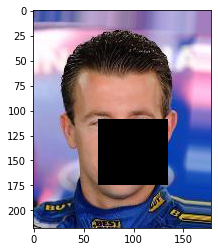

In [1184]:
mask = random_rectangle(img)
plt.imshow(mask)
plt.imshow(apply_mask(img, mask))

In [1205]:
img = Image.open('./img.png')
img = img.resize((64, 64), Image.ANTIALIAS)
img = np.asarray(img)

In [1283]:
from inpaint_model import InpaintModel
import inpaint_model
from imp import reload 
reload(inpaint_model)
im = InpaintModel()

Average network found !


In [1245]:
mask = random_rectangle(img)

In [1248]:
img = apply_mask(img, mask)

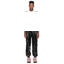

In [1249]:
Image.fromarray(img)

In [1284]:
im.inpaint(img, mask)

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

In [1240]:
%matplotlib inline